# Project 6: Working with Geocoded Data

## Building Maps in _geopandas_

In this lesson we will download COVID-19 data from data.world. We will normalize the data to compare spread between counties. Were we to simply plot the total number of cases or deaths by county, the results would be biased as counties with larger populations would likely have more cases and more deaths. We will observe how the spread developed across the country, starting in the northeast, eventually making its way to other regions.

### Installing geopandas

Although there is a geopandas installation available using the *conda install* command in you command line shell, that package is incomplete for our purposes. We will need to install dependencies - in this order: *GDAL*,*Fiona*, and *Shapely* - for geopandas before installing geopandas. I have included the *.whl* files for each of these packages in the same folder is this notebook. Download the files and save them to your local folder. To install, use  the command:

> *pip install filename*

If you are using a machine for which you are not the administrator, use the command:

> *pip install filename --user*

Install the libraries using these commands from an administrator shell or using --user at the end of the statement: 

>*pip install GDAL-3.1.4-cp37-cp37m-win_amd64.whl*

>*pip install Fiona-1.8.17-cp37-cp37m-win_amd64.whl*

>*pip install Shapely-1.7.1-cp37-cp37m-win_amd64.whl*

If you are using Python 3.8, use the following wheels:

>*pip install GDAL-3.1.4-cp38-cp38-win_amd64.whl*

>*pip install Fiona-1.8.17-cp38-cp38-win_amd64.whl*

>*pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl*

If you are using a mac, you may install the appropriate module by selecting the version.

> *pip install -v GDAL==3.1.4*

> *pip install -v Fiona==1.8.17*

> *pip install -v Shapely==1.7.1*

Finally, install geopandas:

> *pip install geopandas*


### Downloading the COVID-19 data

We will use two datasets. First, we will import a shapefile to use with *geopandas*, which we will later use to generate a county level map that tracks COVID-19. The shapefile is provide for you in the Github folder housing this post. You can also download shapefiles from the U.S. Census [website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). We will download Johns Hopkins's COVID-19 data from the Associated Press's [account](https://data.world/associatedpress/johns-hopkins-coronavirus-case-tracker) at data.world using their [Python module](https://data.world/integrations/python). Follow [these instructions](https://github.com/datadotworld/data.world-py/) to install the  *datadotworld* module and access their API.

>*Datadotworld* may be useful efficiently collecting data for class projects, so keep this libary in mind as you make plans for your project.

First we will create the functions that download and import the data, then we will call these functions in the following cells.

In [1]:
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

def import_covid_data(FIPS_name):
    # Load COVID19 county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will only use #2
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    # Transform FIPS codes into integers
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    
    # Prepare a column for state abbreviations. we will draw these 
    # from state_dict
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        #.loc[row(s), col]
        covid_data.loc[
            covid_data["state"] == state, "state_abr"] = abr
    # save location name as Cass, ND 
    covid_data["Location"] = covid_data["location_name"] + ", " +\
        covid_data["state_abr"]
    return covid_data

def import_geo_data(filename, index_col = "Date", 
                    FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename, 
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                   inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}


In [2]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\JLCat\AppData\Roaming\Python\Python37\site-packages\datadotworld\models\dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  'Error: {}'.format(resource_name, e))


In [3]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
          2020-01-27  84001001        county       Autauga  Alabama   
          2020-01-28  84001001        county       Autauga  Alabama   
          2020-01-29  84001001        county       Autauga  Alabama   
          2020-01-30  84001001        county       Autauga  Alabama   
          2020-01-31  84001001        county       Autauga  Alabama   
          2020-02-01  84001001        county       Autauga  Alabama   
          2020-02-02  84001001        county       Autauga  Alabama   
          2020-02-03  84001001        county       Autauga  Alabama   
          2020-02-04  84001001        county       Autauga  Alabama   
          2020-02-05  84001001        county       Autauga  Alabama   
          2020-02-06  84001001        county       Autauga  Alabama   
          2020-02-07  84001001        county       Autauga  Alabama   
          2020-02-08  84001001        county       Autauga  Alabama   
          2020-02-09  84001001        county       Autauga  Alabama   
          2020-02-10  84001001        county       Autauga  Alabama   
          2020-02-11  84001001        county       Autauga  Alabama   
          2020-02-12  84001001        county       Autauga  Alabama   
          2020-02-13  84001001        county       Autauga  Alabama   
          2020-02-14  84001001        county       Autauga  Alabama   
          2020-02-15  84001001        county       Autauga  Alabama   
          2020-02-16  84001001        county       Autauga  Alabama   
          2020-02-17  84001001        county       Autauga  Alabama   
          2020-02-18  84001001        county       Autauga  Alabama   
          2020-02-19  84001001        county       Autauga  Alabama   
          2020-02-20  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-09-29  84056045        county        Weston  Wyoming   
          2020-09-30  84056045        county        Weston  Wyoming   
          2020-10-01  84056045        county        Weston  Wyoming   
          2020-10-02  84056045        county        Weston  Wyoming   
          2020-10-03  84056045        county        Weston  Wyoming   
          2020-10-04  84056045        county        Weston  Wyoming   
          2020-10-05  84056045        county        Weston  Wyoming   
          2020-10-06  84056045        county        Weston  Wyoming   
          2020-10-07  84056045        county        Weston  Wyoming   
          2020-10-08  84056045        county        Weston  Wyoming   
          2020-10-09  84056045        county        Weston  Wyoming   
          2020-10-10  84056045        county        Weston  Wyoming   
          2020-10-11  84056045        county        Weston  Wyoming   
          2020-10-12  84056045        county        Weston  Wyoming   
          2020-10-13  84056045        county        Weston  Wyoming   
          2020-10-14  84056045        county        Weston  Wyoming   
          2020-10-15  84056045        county        Weston  Wyoming   
          2020-10-16  84056045        county        Weston  Wyoming   
          2020-10-17  84056045        county        Weston  Wyoming   
          2020-10-18  84056045        county        Weston  Wyoming   
          2020-10-19  84056045        county        Weston  Wyoming   
          2020-10-20  84056045        county        Weston  Wyoming   
          2020-10-21  84056045        county        Weston  Wyoming   
          2020-10-22  84056045        county       

In [4]:
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)

In [5]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
21093,21,093,00516893,0500000US21093,Hardin,06,1614569777,17463238,110958.0,Kentucky,"POLYGON ((-86.27756 37.58881, -86.27420 37.589..."
21099,21,099,00516896,0500000US21099,Hart,06,1068530028,13692536,19035.0,Kentucky,"POLYGON ((-86.16112 37.35080, -86.15845 37.351..."
21131,21,131,00516912,0500000US21131,Leslie,06,1038206077,9189732,9877.0,Kentucky,"POLYGON ((-83.55310 37.07928, -83.53528 37.103..."
21151,21,151,00516919,0500000US21151,Madison,06,1132729653,15306635,92987.0,Kentucky,"POLYGON ((-84.52564 37.76950, -84.52350 37.771..."


The geodataframe holds the geometry of the goegraphic entity. In our case, this indicates the boundaries of the counties. Next, let's print the boundaries of Cass county using its FIPS, 38017. After that, we will call the value without print() to see the actual shape.

In [6]:
print(map_data.loc[38017, "geometry"])

POLYGON ((-97.70617899999999 46.99106399999999, -97.706013 46.992298, -97.70553699999999 47.065541, -97.705535 47.080119, -97.70568399999999 47.15275399999999, -97.705552 47.179476, -97.70572199999999 47.181704, -97.706034 47.239978, -97.68533099999999 47.239829, -97.578408 47.23901799999999, -97.49406499999999 47.239233, -97.482708 47.239263, -97.45151199999999 47.239061, -97.32446399999999 47.238755, -97.30376799999999 47.23862, -97.21766 47.23875899999999, -97.197006 47.238801, -97.13403699999999 47.238793, -97.12424299999999 47.238783, -97.11264199999999 47.238783, -97.101708 47.23877299999999, -97.070137 47.238779, -97.007018 47.238777, -97.003299 47.23878999999999, -97.002692 47.238861, -97.00198899999999 47.238797, -96.998364 47.23881, -96.94309799999999 47.23878699999999, -96.900397 47.238297, -96.84706799999999 47.237732, -96.83327850519149 47.2382080185729, -96.83240780714328 47.2376111364146, -96.830838 47.236535, -96.82887799999999 47.234248, -96.828948 47.232155, -96.82995

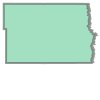

In [7]:
map_data.loc[38017, "geometry"]

We can plot all of the data at once using df.plot(). However, we will want to specify map parameters.

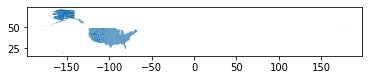

In [8]:
map_data.plot()

In [9]:
#COVID19Map.py
#. . . 
def create_covid_geo_dataframe(covid_data, map_data, dates):
    data_frame_initialized = False
    for date in dates:
        # select county observations from each date in dates
        df = covid_data[covid_data.index.get_level_values("date") == date]
        counties = df.index.get_level_values("fips_code")
        # select only the subset of counties in the map that
        # are also present in the covid_data
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # or stack thenew  data frame and the dataframe that was initialized at
            # i = 0
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    
    for key, val in covid_data.items():
        matching_gpd[key] = val
    return matching_gpd
        
        
# . . . 
# create a list of dates
# set(lst) removes duplicate entries
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_covid_geo_dataframe(covid_data, map_data, dates)

        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

In [10]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Autauga, AL"
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Baldwin, AL"
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Barbour, AL"
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Bibb, AL"
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Blount, AL"
1011,2020-01-22,1,011,00161531,0500000US01011,Bullock,06,1613059160,6054988,10101.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Bullock, AL"
1013,2020-01-22,1,013,00161532,0500000US01013,Butler,06,2012002530,2701198,19448.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Butler, AL"
1015,2020-01-22,1,015,00161533,0500000US01015,Calhoun,06,1569189622,16627597,113605.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Calhoun, AL"
1017,2020-01-22,1,017,00161534,0500000US01017,Chambers,06,1545085607,16971701,33254.0,Alabama,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Chambers, AL"


In [11]:
def create_new_vars(covid_data, moving_average_days):
    # use a for loop that performs the same operations for cases and deaths
    for key in ("cases", "deaths"):
        cap_key = key.title()
        covid_data[cap_key + " per Million"] = covid_data["cumulative_" + key]\
            .div(covid_data["total_population"]).mul(10**6)
        # .groupby("fips_code")
        covid_data["Daily " + cap_key + " per Million"] =\
            covid_data["cumulative_"+key].groupby(covid_data.index.names[0])\
            .diff(1).div(covid_data["total_population"]).mul(10**6)
        covid_data["Daily " + cap_key + " per Million MA"] = covid_data["Daily " +\
                cap_key + " per Million"].rolling(moving_average_days).mean()        

moving_average_days = 7
create_new_vars(covid_data, moving_average_days)

In [12]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location,Cases per Million,Daily Cases per Million,Daily Cases per Million MA,Deaths per Million,Daily Deaths per Million,Daily Deaths per Million MA
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,NaN,NaN,AL,"Autauga, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,NaN,NaN,AL,"Baldwin, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,NaN,NaN,AL,"Barbour, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,NaN,NaN,AL,"Bibb, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,NaN,NaN,AL,"Blount, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1011,2020-01-22,1,011,00161531,0500000US01011,Bullock,06,1613059160,6054988,10101.0,Alabama,...,NaN,NaN,AL,"Bullock, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1013,2020-01-22,1,013,00161532,0500000US01013,Butler,06,2012002530,2701198,19448.0,Alabama,...,NaN,NaN,AL,"Butler, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1015,2020-01-22,1,015,00161533,0500000US01015,Calhoun,06,1569189622,16627597,113605.0,Alabama,...,NaN,NaN,AL,"Calhoun, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1017,2020-01-22,1,017,00161534,0500000US01017,Chambers,06,1545085607,16971701,33254.0,Alabama,...,NaN,NaN,AL,"Chambers, AL",0.000000,NaN,NaN,0.000000,NaN,NaN


Text(0.5, 1, '2020-10-28\nCovid-19 in the U.S.')

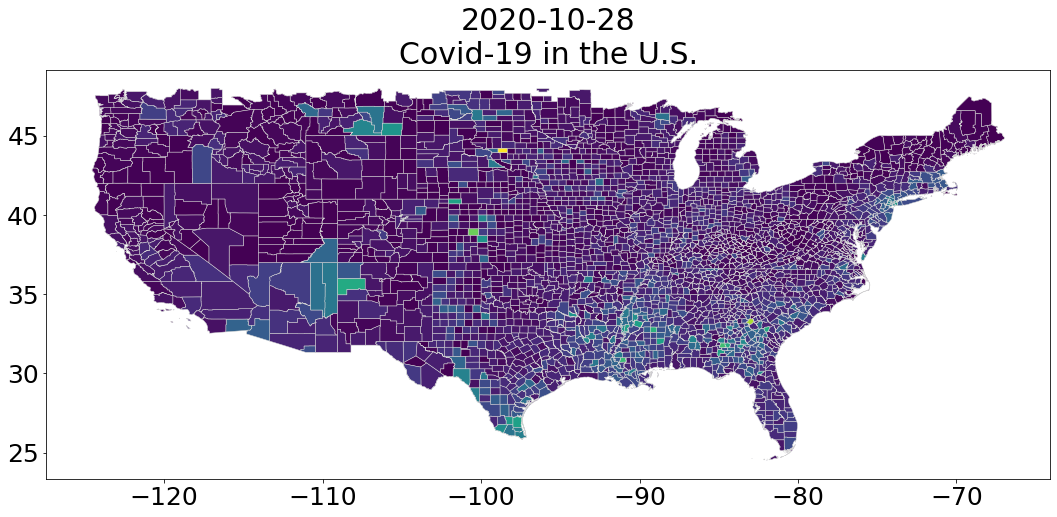

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

# only select data that falls within bounds of coordinates
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
        
    return data

date = dates[-1]

# choose map bounds
if "map_bounded" not in locals():
    minx = -127
    miny = 23
    maxx = -66
    maxy = 48
    covid_data = select_data_within_bounds(covid_data, minx, miny, maxx, maxy)
    map_bounded = True
    
fig, ax = plt.subplots(figsize = (18, 8),
    subplot_kw = {"aspect":"equal"})
plt.rcParams.update({"font.size":30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_data[covid_data.index.get_level_values("date") == date]
df.plot(ax = ax, cax = ax, column = key, linewidth = .5,
       edgecolor = "lightgrey")

ax.set_title(str(date) +"\nCovid-19 in the U.S.", fontsize = 30)